In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
pd.set_option('display.max_columns', None)


In [ ]:
df=pd.read_excel('/content/Life_Expectancy_Data (2).xlsx')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.shape[0]

2938

In [ ]:
df.shape[1]

22

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df.select_dtypes(['object'])

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [ ]:
df.select_dtypes(['int','float'])

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.select_dtypes(['object']).count

<bound method DataFrame.count of           Country      Status
0     Afghanistan  Developing
1     Afghanistan  Developing
2     Afghanistan  Developing
3     Afghanistan  Developing
4     Afghanistan  Developing
...           ...         ...
2933     Zimbabwe  Developing
2934     Zimbabwe  Developing
2935     Zimbabwe  Developing
2936     Zimbabwe  Developing
2937     Zimbabwe  Developing

[2938 rows x 2 columns]>

In [ ]:
df.select_dtypes(exclude=['int','float'])

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [ ]:
df[df.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [ ]:
print(list(df.columns),end="")

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [ ]:
df1=df.rename(columns={'Life expectancy':'Life_expectancy','Adult Mortality':'Adult_Mortality',
                   'infant deaths':'infant_deaths','percentage expenditure':'perc_expenditure',
                   'Hepatitis B':'Hepatitis_B','under-five deaths':'under_five_deaths',
                   'Total expenditure':'Total_expenditure','thinness  1-19 years':'thinness_1_19_years',
                   'thinness 5-9 years':'thinness_5_9_years','Income composition of resourc':'Income_composition_of_resourc'})

In [ ]:
df1.head()


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
perc_expenditure                     0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# check the percentage of null values present in the dataset
(df1.isnull().sum()/len(df)*100).round(2)

Country                             0.00
Year                                0.00
Status                              0.00
Life_expectancy                     0.34
Adult_Mortality                     0.34
infant_deaths                       0.00
Alcohol                             6.60
perc_expenditure                    0.00
Hepatitis_B                        18.82
Measles                             0.00
BMI                                 1.16
under_five_deaths                   0.00
Polio                               0.65
Total_expenditure                   7.69
Diphtheria                          0.65
HIV/AIDS                            0.00
GDP                                15.25
Population                         22.19
thinness_1_19_years                 1.16
thinness_5_9_years                  1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [ ]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [ ]:
df1['Hepatitis_B'].unique()

array([65., 62., 64., 67., 68., 66., 63., 99., 98., 97., 96., 95., 94.,
       91.,  9.,  8., 83., 81., nan, 77., 75., 72., 61., 69., 73., 85.,
       84., 88., 93., 89., 78., 55., 92., 86., 44., 33., 74., 52., 49.,
        5., 51., 21., 45., 11., 87., 18., 56.,  7.,  6., 76., 82., 79.,
       15., 36., 48.,  1.,  4., 42., 28., 14., 47., 23., 46., 37., 39.,
       24., 17., 27., 25., 16.,  2., 35., 29., 26., 54., 57., 38., 59.,
       71., 43., 58., 41., 31., 12., 32., 22., 53., 19.])

In [ ]:
df1['Hepatitis_B'].agg(['min','max','mean','median'])

min        1.000000
max       99.000000
mean      80.940461
median    92.000000
Name: Hepatitis_B, dtype: float64

In [ ]:
df1['Hepatitis_B'].value_counts()

Hepatitis_B
99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
       ... 
15.0      1
12.0      1
32.0      1
11.0      1
19.0      1
Name: count, Length: 87, dtype: int64

In [ ]:
df1['Hepatitis_B']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    68.0
2934     7.0
2935    73.0
2936    76.0
2937    79.0
Name: Hepatitis_B, Length: 2938, dtype: float64

In [ ]:
df1['Hepatitis_B'].fillna(df1['Hepatitis_B'].median(),inplace=True)

In [ ]:
df1['Adult_Mortality'].fillna(df1['Adult_Mortality'].median(),inplace=True)
df1['Life_expectancy'].fillna(df1['Life_expectancy'].median(),inplace=True)
df1['Diphtheria'].fillna(df1['Diphtheria'].median(),inplace=True)
df1['Alcohol'].fillna(df1['Alcohol'].median(),inplace=True)
df1['BMI'].fillna(df1['BMI'].median(),inplace=True)
df1['Alcohol'].fillna(df1['Alcohol'].median(),inplace=True)
df1['Alcohol'].fillna(df1['Alcohol'].median(),inplace=True)
df1['Polio'].fillna(df1['Polio'].median(),inplace=True)
df1['Total_expenditure'].fillna(df1['Total_expenditure'].median(),inplace=True)
df1['thinness_5_9_years'].fillna(df1['thinness_5_9_years'].median(),inplace=True)
df1['thinness_1_19_years'].fillna(df1['thinness_1_19_years'].median(),inplace=True)
df1['Population'].fillna(df1['Population'].mean(),inplace=True)
df1['GDP'].fillna(df1['GDP'].mean(),inplace=True)
df1['Income composition of resources'].fillna(df1['Income composition of resources'].mean(),inplace=True)





In [ ]:
df1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
perc_expenditure                     0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness_1_19_years                  0
thinness_5_9_years                   0
Income composition of resources      0
Schooling                          163
dtype: int64

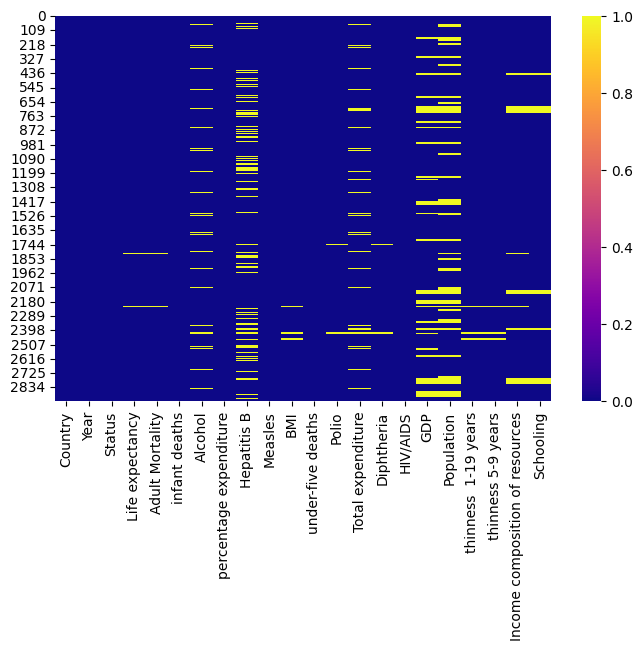

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cmap='plasma')
plt.show()

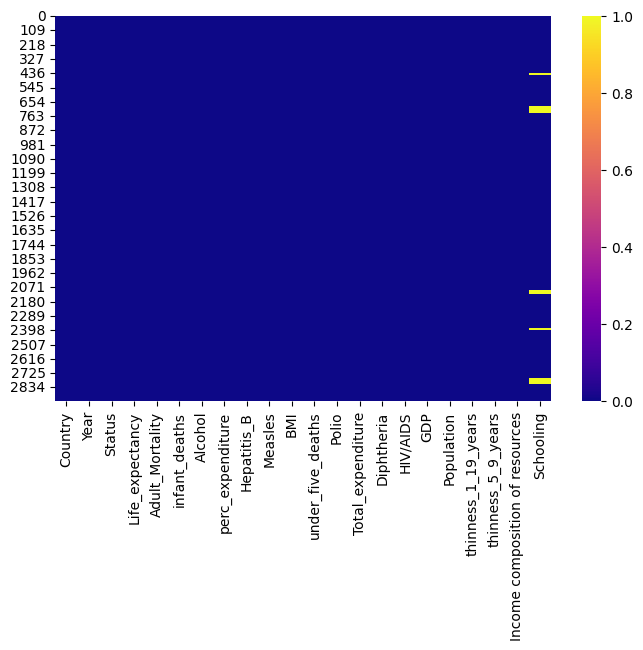

In [ ]:
# now check the missing values in the data
plt.figure(figsize=(8,5))
sns.heatmap(df1.isnull(),cmap='plasma')
plt.show()

In [ ]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [ ]:
df1.Life_expectancy	.min()

36.3

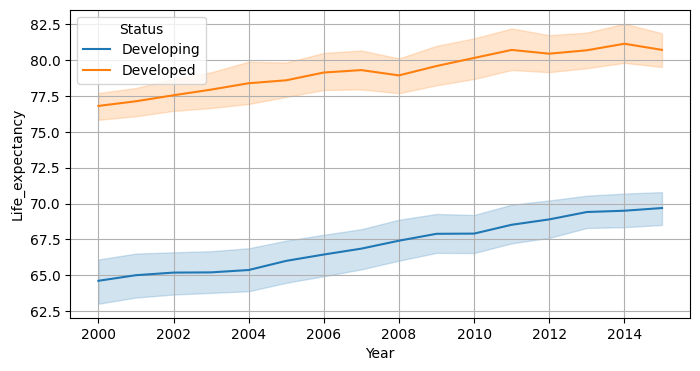

In [ ]:
# life expentancy over the year on the basis of country status
plt.figure(figsize=(8,4))
sns.lineplot(df1,x='Year',y='Life_expectancy',hue='Status')
plt.grid()
plt.show()


Text(0.5, 1.0, 'Percentage of data present according to country status')

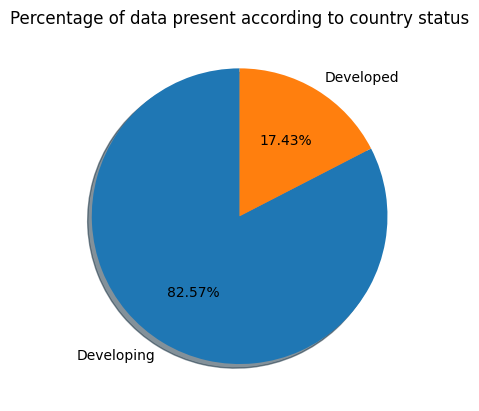

In [ ]:
# Percentage of data present according to country status
plt.pie(df1['Status'].value_counts(),labels=df['Status'].value_counts().index,
        autopct='%.2f%%',startangle=90,shadow=True)
plt.title('Percentage of data present according to country status')

In [ ]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [ ]:
# top 10 country on the basis of life expentency
top_10_coun=df1.groupby('Country')['Life_expectancy'].mean().reset_index(name='top_life').sort_values(by='top_life',ascending=False).head(10)

In [ ]:
top_10_coun

,Country,top_life
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [ ]:
# bottom 10 country on the basis of life expentency
bottom_10_coun=df1.groupby('Country')['Life_expectancy'].mean().reset_index(name='bottom_life').sort_values(by='bottom_life',ascending=True).head(10)

In [ ]:
bottom_10_coun

,Country,bottom_life
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,CÃ´te d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


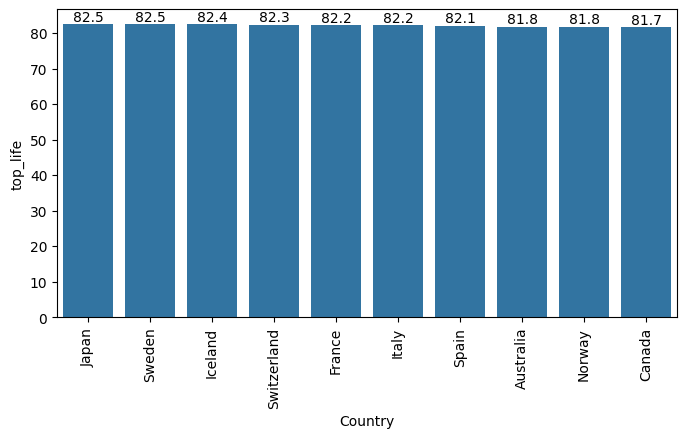

In [ ]:
# Make a plot for top 10 and bottom 10 countries
plt.figure(figsize=(8,4))
ax=sns.barplot(top_10_coun,x='Country',y='top_life')
ax.bar_label(ax.containers[0],fmt='%.1f')
plt.xticks(rotation=90)
plt.show()

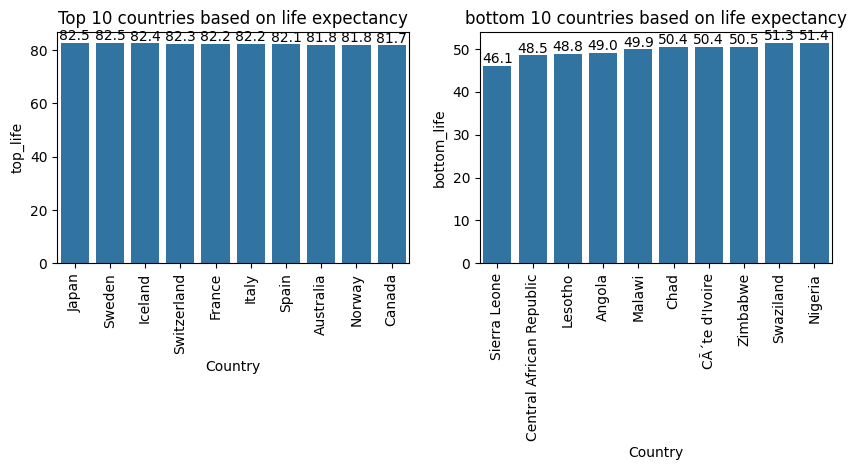

In [ ]:
# Make a plot for top 10 and bottom 10 countries
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
ax=sns.barplot(top_10_coun,x='Country',y='top_life')
plt.title('Top 10 countries based on life expectancy')
ax.bar_label(ax.containers[0],fmt='%.1f')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax=sns.barplot(bottom_10_coun,x='Country',y='bottom_life')
plt.title('bottom 10 countries based on life expectancy')
ax.bar_label(ax.containers[0],fmt='%.1f')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def new_age(life_expectancy):
    if life_expectancy <= 50:
        return 'young'
    elif life_expectancy > 50 and life_expectancy <70:
        return 'Middle'
    else:
        return 'old'
df1['new_define_age'] = df1['Life_expectancy'].apply(new_age)


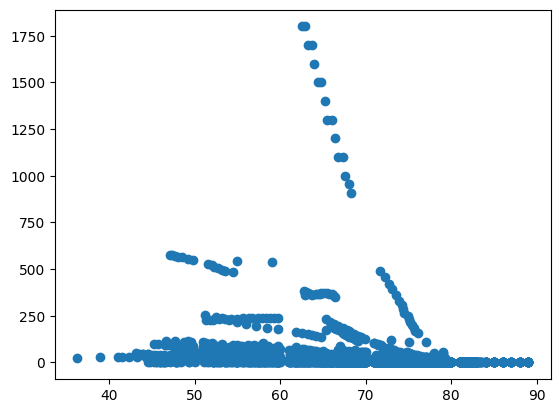

In [ ]:
plt.scatter(df1['Life_expectancy'],df1['infant_deaths'])

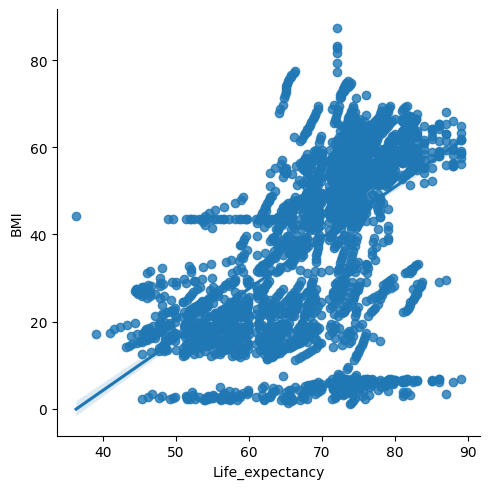

In [ ]:
sns.lmplot(x='Life_expectancy',y='BMI',data=df1)

**One of the most trend comes in this chart  that is when life expectancy increased BMI also increased day by day**


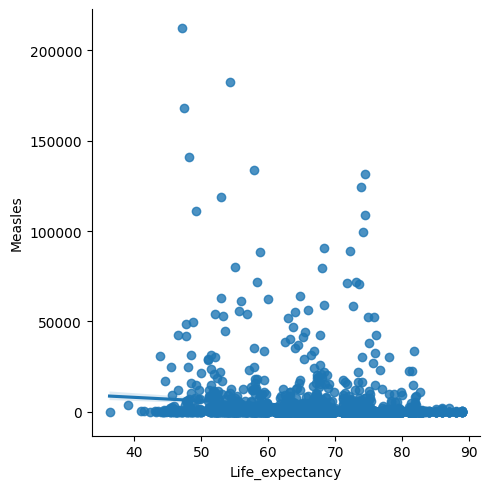

In [ ]:
sns.lmplot(x='Life_expectancy',y='Measles',data=df1)

**Measles doesn't  affect more on life expectancy**

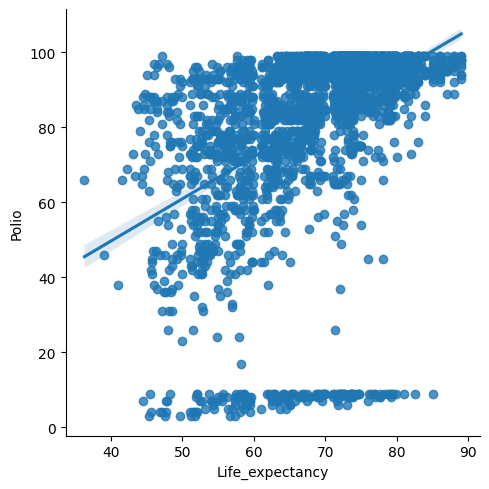

In [ ]:
sns.lmplot(x ='Life_expectancy', y ='Polio', data = df1)
plt.show()

**In this chart  we are seen that polio impact on those peoples  who are more than 60 ages.**

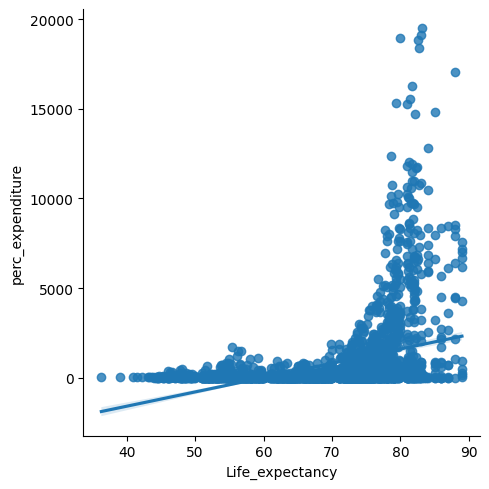

In [ ]:
sns.lmplot(x ='Life_expectancy', y ='perc_expenditure', data = df1)
plt.show()

In [ ]:
new=df1.groupby(['Year','Status'])['Life_expectancy'].mean().reset_index(name='mean life')

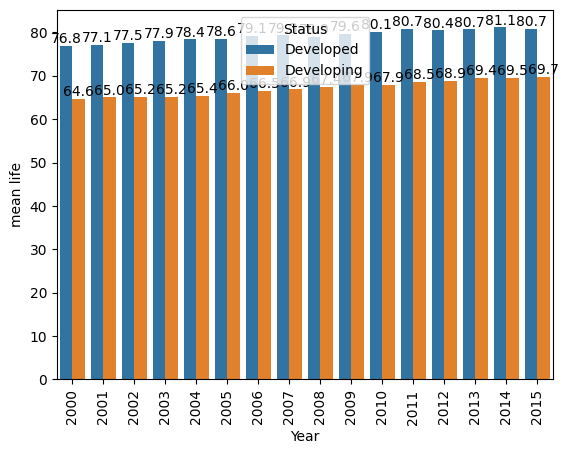

In [ ]:
ax=sns.barplot(new,x='Year',y='mean life',hue='Status')
ax.bar_label(ax.containers[0],fmt='%.1f')
ax.bar_label(ax.containers[1],fmt='%.1f')
plt.xticks(rotation=90)
plt.show()



# we have seen that from 2000 to 2015 every year mean life  is increased in both developing and developed country

In [ ]:
def new_age(Life_expectancy):
  if Life_expectancy<=50:
    return 'young'
  elif Life_expectancy > 50 and Life_expectancy < 70:
    return 'middle'
  else:
    'old'

df1['new_define_age'] = df1['Life_expectancy'].apply(new_age)

In [ ]:
df1.rename(columns={'Income composition of resources':'income'},inplace=True)

In [ ]:
df1.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income,Schooling,new_define_age
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,middle
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,middle
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,middle
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,middle
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,middle


([0, 1], [Text(0, 0, 'middle'), Text(1, 0, 'young')])

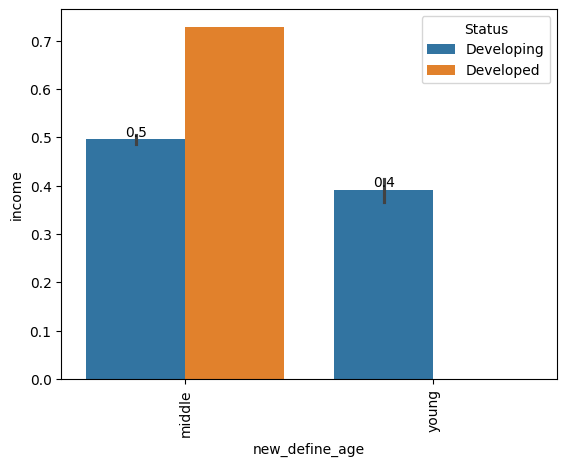

In [ ]:
ax=sns.barplot(df1,x='new_define_age',y='income',hue='Status')
ax.bar_label(ax.containers[0],fmt='%.1f')
plt.xticks(rotation=90)

In [ ]:
df1['perc_expenditure'].agg(['min','max','mean','median'])

min           0.000000
max       19479.911610
mean        738.251295
median       64.912906
Name: perc_expenditure, dtype: float64

In [ ]:
def new_expand(perc_expenditure):
  if perc_expenditure<=1000:
    return 'low_expand'
  elif perc_expenditure>1000 and perc_expenditure<6000:
    return 'avg_expand'
  else:
    return 'high_expand'
df1['new_expenditure']=df1['perc_expenditure'].apply(new_expand)

In [ ]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income,Schooling,new_define_age,new_expenditure
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,middle,low_expand
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,middle,low_expand


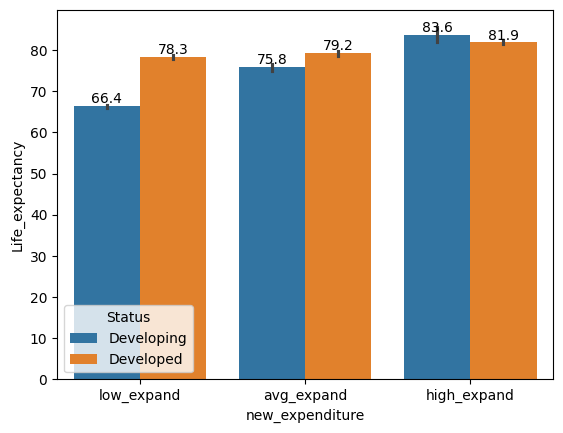

In [ ]:
ax=sns.barplot(df1,y='Life_expectancy',x='new_expenditure',hue='Status')
ax.bar_label(ax.containers[0],fmt='%.1f')
ax.bar_label(ax.containers[1],fmt='%.1f')
plt.show()

**In this chart we have found, developed country expend money more than developing country for their life and its a good sign that is,life expentancy increased day day in every year**

In [ ]:
#top 10 country name on the value of life expectancy
df1.sort_values('Life_expectancy',ascending=False).head(10).reset_index()

,index,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,perc_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income,Schooling,new_define_age,new_expenditure
0,1850,New Zealand,2010,Developed,89.0,71.0,0,9.62,6664.148708,9.0,43,64.8,0,93.0,11.20,93.0,0.1,33691.34837,1.275338e+07,0.3,0.3,0.899,20.3,None,high_expand
1,915,Finland,2014,Developing,89.0,78.0,0,8.80,6164.455402,92.0,0,61.7,0,98.0,9.68,98.0,0.1,49914.61864,5.461512e+06,0.9,0.8,0.890,17.0,None,high_expand
2,241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,63.4,1,99.0,1.59,99.0,0.1,47439.39684,1.129570e+05,1.0,1.0,0.890,16.3,None,high_expand
3,2433,Spain,2007,Developed,89.0,72.0,2,11.05,510.932701,96.0,267,61.7,2,96.0,8.36,96.0,0.1,3279.41400,4.522683e+06,0.6,0.5,0.849,16.0,None,low_expand
4,2513,Sweden,2007,Developed,89.0,63.0,0,6.90,7593.391622,92.0,1,56.1,0,98.0,8.92,98.0,0.1,53324.37937,9.148920e+05,1.3,1.3,0.895,15.8,None,high_expand
5,995,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.0,443,61.9,3,94.0,11.30,95.0,0.1,4792.65288,8.982500e+04,1.1,1.1,0.920,17.0,None,low_expand
6,1916,Norway,2009,Developed,89.0,67.0,0,6.68,142.374943,92.0,2,58.5,0,94.0,9.49,94.0,0.1,817.77681,4.828726e+06,0.7,0.7,0.936,17.4,None,low_expand
7,2056,Portugal,2014,Developed,89.0,78.0,0,9.88,271.254553,98.0,0,6.9,0,98.0,9.50,98.0,0.1,2277.53613,1.416200e+04,0.7,0.5,0.837,16.8,None,low_expand
8,1293,Italy,2004,Developed,89.0,66.0,2,8.98,4270.914882,96.0,599,57.6,3,97.0,8.49,94.0,0.1,31174.56118,5.768533e+07,0.5,0.5,0.846,15.6,None,avg_expand
9,937,France,2008,Developing,89.0,88.0,3,11.90,7002.785925,47.0,604,59.1,3,98.0,1.57,98.0,0.1,45413.65710,6.437499e+06,0.6,0.6,0.877,16.1,None,high_expand


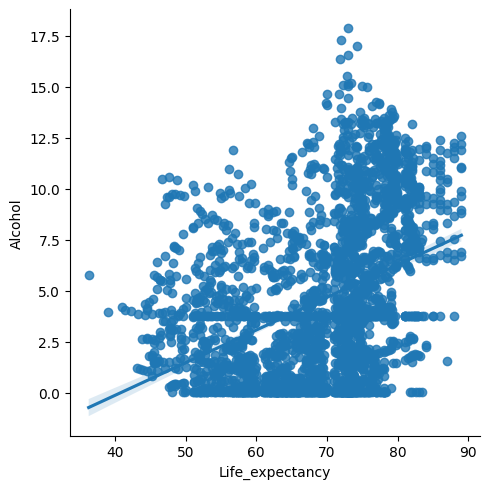

In [ ]:
sns.lmplot(df1,x='Life_expectancy',y='Alcohol')

#Alcohol is impact on life expectancy, because 50 to 80 ages ranges peoples
taken so much amount of alcohol